Model Accuracy: 100.00%
Precision: 0.00
Recall: 0.00
F1-score: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


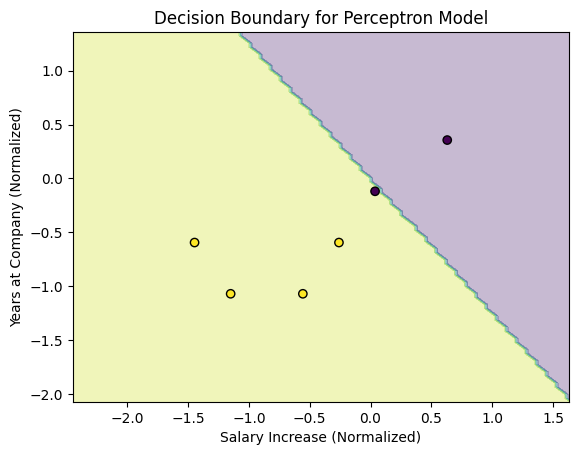

Enter details for a new employee:
Salary Increase (%): 5
Years at Company: 4
Job Satisfaction (1-5): 4
Work-Life Balance (1-5): 4
Prediction: Employee is likely to stay.


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Step 1: Create a Sample Dataset with Different Values
data = pd.DataFrame({
    'Salary Increase': [6, 12, 3, 9, 2, 11, 5, 7],
    'Years at Company': [2, 6, 1, 4, 2, 7, 1, 3],
    'Job Satisfaction': [3, 5, 2, 4, 1, 5, 2, 3],
    'Work-Life Balance': [3, 5, 2, 4, 1, 5, 3, 4],
    'Attrition': [1, 0, 1, 0, 1, 0, 1, 0]
})

# Step 2: Prepare features and labels
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels

# Step 3: Normalize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Initialize Parameters
learning_rate = 0.1
epochs = 10
n_samples, n_features = X_train.shape
weights = np.zeros(n_features)
bias = 0

# Step 6: Define the activation function
def activation(x):
    return 1 if x >= 0 else 0

# Step 7: Train the Perceptron Model
for _ in range(epochs):
    for i in range(n_samples):
        linear_output = np.dot(X_train[i], weights) + bias
        y_pred = activation(linear_output)
        # Perceptron Learning Rule
        update = learning_rate * (y_train[i] - y_pred)
        weights += update * X_train[i]
        bias += update

# Step 8: Define the prediction function
def predict(X):
    linear_output = np.dot(X, weights) + bias
    return np.array([activation(x) for x in linear_output])

# Step 9: Test the Model
y_pred = predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Step 10: Visualize the Decision Boundary (for first two features)
def plot_decision_boundary(X, y, weights, bias):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()),
                      np.zeros_like(xx.ravel())])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel("Salary Increase (Normalized)")
    plt.ylabel("Years at Company (Normalized)")
    plt.title("Decision Boundary for Perceptron Model")
    plt.show()

plot_decision_boundary(X_train, y_train, weights, bias)

# Step 11: Take User Input for Prediction
print("Enter details for a new employee:")
salary_increase = float(input("Salary Increase (%): "))
years_at_company = float(input("Years at Company: "))
job_satisfaction = float(input("Job Satisfaction (1-5): "))
work_life_balance = float(input("Work-Life Balance (1-5): "))

new_employee = np.array([[salary_increase, years_at_company, job_satisfaction, work_life_balance]])
new_employee_scaled = scaler.transform(new_employee)

prediction = predict(new_employee_scaled)

if prediction[0] == 1:
    print("Prediction: Employee is likely to leave.")
else:
    print("Prediction: Employee is likely to stay.")
